In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('economic_index.csv')


In [13]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
df.drop(columns=['Unnamed: 0','year','month'],inplace=True,axis=1)

In [14]:
#Check null values or not
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [15]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


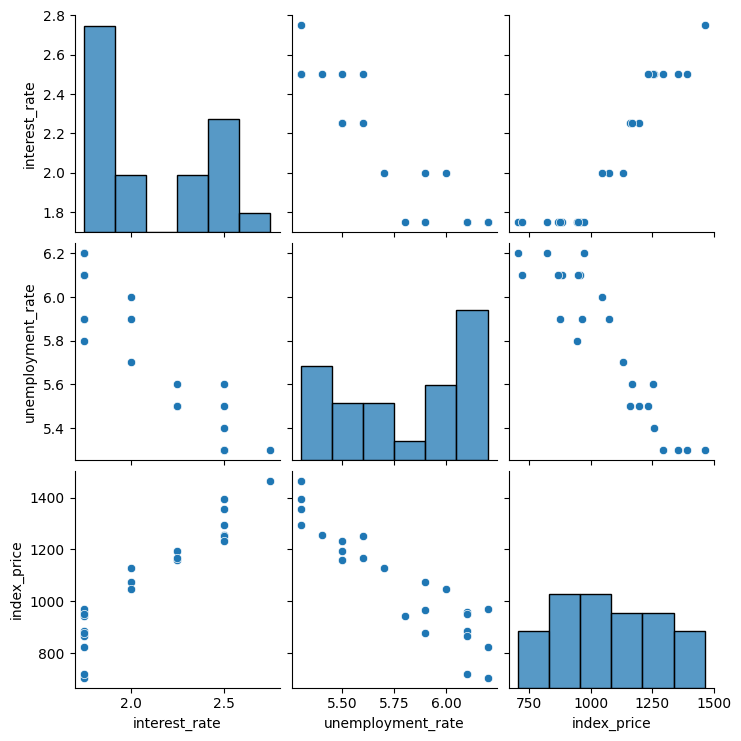

In [16]:
import seaborn as sns
sns.pairplot(df)

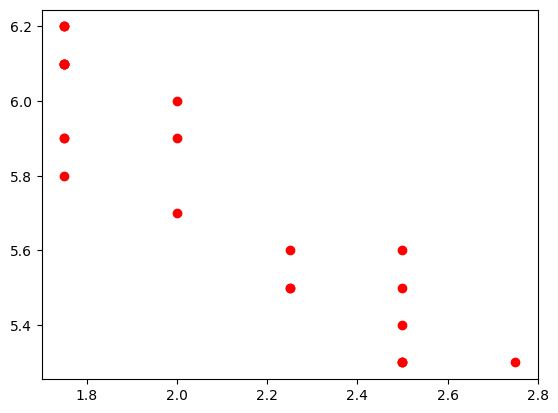

In [19]:
## Visualize the datapoints 
plt.scatter(df['interest_rate'],df['unemployment_rate'],c='r')
plt.show()

In [21]:
X = df.drop(['index_price'],axis=1)
y= df['index_price']

In [22]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

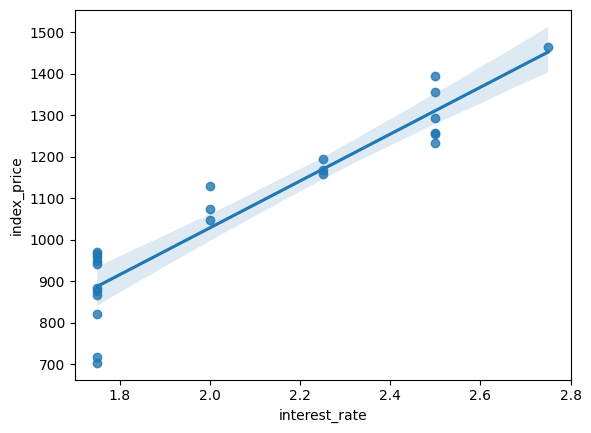

In [29]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

In [31]:
# Stadardization
#  mean = 0 sd = 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


f:\ML Revise\krishenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [32]:
### apply Simple Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [33]:
## Cross_val_Score
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [34]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [35]:
## prediction
y_pred = model.predict(X_test)

In [36]:
y_pred


array([612.64375972, 487.12736973, 680.03156939, 498.75308579,
       544.07270669, 601.01804366])

In [38]:
## performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse,mae,rmse)

316313.15240145824 549.3922441707887 562.4172404909528


In [39]:
## R2

from sklearn.metrics import r2_score
score_r2 = r2_score(y_test,y_pred)
print(score_r2)

-8.395998348460054


### Assumptions


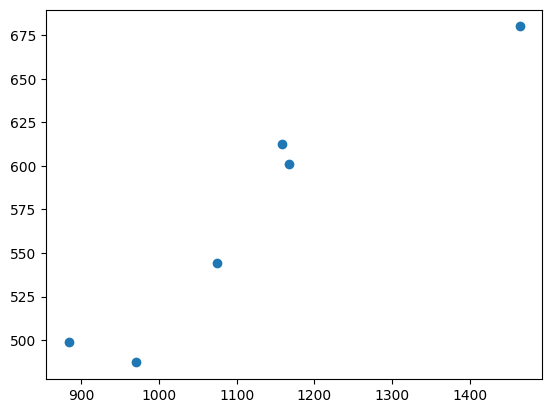

In [40]:
plt.scatter(y_test,y_pred)

In [43]:
residals = y_test - y_pred

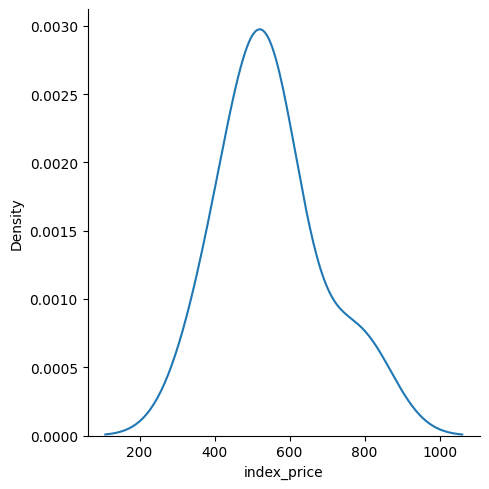

In [44]:
# plot the residuals
sns.displot(residals,kind='kde')

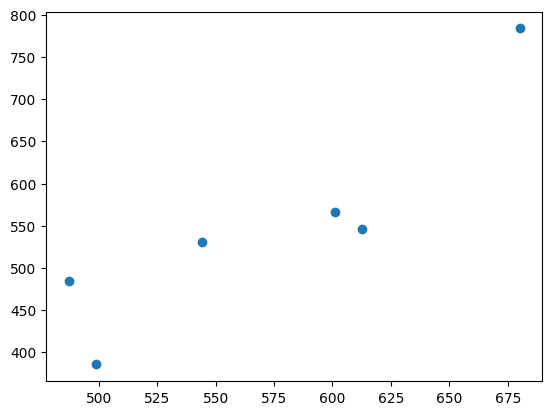

In [45]:
### Scatter plot with prediction and residuals
plt.scatter(y_pred,residals)

In [46]:
#OLS Linear regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                       0.754
Time:                        17:44:01   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

f:\ML Revise\krishenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
